In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import os
import io
import math
import sys

sys.path.append(os.path.join(os.path.dirname(
    os.path.abspath(''))))
import common.plots as plots

In [2]:
def read_wilson_loops(paths, coluns_to_multiindex = []):
    df = []
    for path in paths:
        df.append(pd.read_csv(path['path']))
        for key, value in path['parameters'].items():
            df[-1][key] = value
        if 'constraints' in path:
            for key, val in path['constraints'].items():
                df[-1] = df[-1][(df[-1][key] >= val[0])
                                    & (df[-1][key] <= val[1])]
        if coluns_to_multiindex:
            df[-1] = df[-1].set_index(coluns_to_multiindex, append=True)
    df = pd.concat(df).reset_index(level=0, drop=True)
    return df

In [5]:
def wilson_alpha_APE(r, T, decomposition_type):
    paths = [{'path': f'../result/wilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.779/alpha_0.1/wilson_loop_{decomposition_type}.csv',
              'parameters': {'alpha_APE': 0.1}, 'constraints': {'r/a': (r, r), 'T': (T, T)}},
              {'path': f'../result/wilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.779/alpha_0.2/wilson_loop_{decomposition_type}.csv',
              'parameters': {'alpha_APE': 0.2}, 'constraints': {'r/a': (r, r), 'T': (T, T)}},
              {'path': f'../result/wilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.779/alpha_0.3/wilson_loop_{decomposition_type}.csv',
              'parameters': {'alpha_APE': 0.3}, 'constraints': {'r/a': (r, r), 'T': (T, T)}},
              {'path': f'../result/wilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.779/alpha_0.4/wilson_loop_{decomposition_type}.csv',
              'parameters': {'alpha_APE': 0.4}, 'constraints': {'r/a': (r, r), 'T': (T, T)}},
              {'path': f'../result/wilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.779/alpha_0.5/wilson_loop_{decomposition_type}.csv',
              'parameters': {'alpha_APE': 0.5}, 'constraints': {'r/a': (r, r), 'T': (T, T)}},
              {'path': f'../result/wilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.779/alpha_0.6/wilson_loop_{decomposition_type}.csv',
              'parameters': {'alpha_APE': 0.6}, 'constraints': {'r/a': (r, r), 'T': (T, T)}},
              {'path': f'../result/wilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.779/alpha_0.7/wilson_loop_{decomposition_type}.csv',
              'parameters': {'alpha_APE': 0.7}, 'constraints': {'r/a': (r, r), 'T': (T, T)}},
              {'path': f'../result/wilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.779/alpha_0.8/wilson_loop_{decomposition_type}.csv',
              'parameters': {'alpha_APE': 0.8}, 'constraints': {'r/a': (r, r), 'T': (T, T)}},
              {'path': f'../result/wilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.779/alpha_0.9/wilson_loop_{decomposition_type}.csv',
              'parameters': {'alpha_APE': 0.9}, 'constraints': {'r/a': (r, r), 'T': (T, T)}},
              {'path': f'../result/wilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.779/alpha_1/wilson_loop_{decomposition_type}.csv',
              'parameters': {'alpha_APE': 1}, 'constraints': {'r/a': (r, r), 'T': (T, T)}}]
    df = read_wilson_loops(paths)
    fg = plots.make_plot(df, 'alpha_APE', 'field', 'smearing_step', 'r/a', 'aV(r)', f'{decomposition_type} wilson_loop vs alpha_APE', '', '', True, err='err')

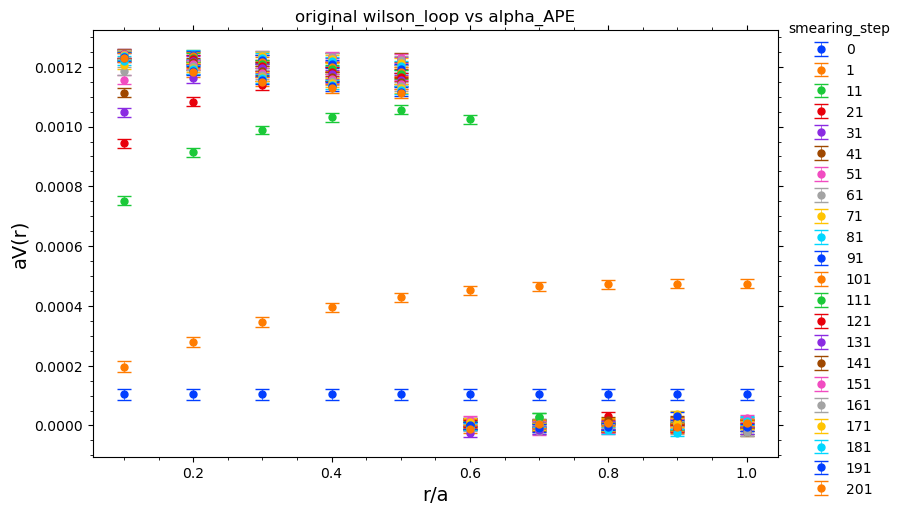

In [7]:
wilson_alpha_APE(10, 10, 'original')

In [8]:
def wilson_alpha_APE_smearing_dependence(r, T, decomposition_type):
    paths = [{'path': f'../result/wilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.779/alpha_0.1/wilson_loop_{decomposition_type}.csv',
              'parameters': {'alpha_APE': 0.1}, 'constraints': {'r/a': (r, r), 'T': (T, T)}},
              {'path': f'../result/wilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.779/alpha_0.2/wilson_loop_{decomposition_type}.csv',
              'parameters': {'alpha_APE': 0.2}, 'constraints': {'r/a': (r, r), 'T': (T, T)}},
              {'path': f'../result/wilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.779/alpha_0.3/wilson_loop_{decomposition_type}.csv',
              'parameters': {'alpha_APE': 0.3}, 'constraints': {'r/a': (r, r), 'T': (T, T)}},
              {'path': f'../result/wilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.779/alpha_0.4/wilson_loop_{decomposition_type}.csv',
              'parameters': {'alpha_APE': 0.4}, 'constraints': {'r/a': (r, r), 'T': (T, T)}},
              {'path': f'../result/wilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.779/alpha_0.5/wilson_loop_{decomposition_type}.csv',
              'parameters': {'alpha_APE': 0.5}, 'constraints': {'r/a': (r, r), 'T': (T, T)}},
              {'path': f'../result/wilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.779/alpha_0.6/wilson_loop_{decomposition_type}.csv',
              'parameters': {'alpha_APE': 0.6}, 'constraints': {'r/a': (r, r), 'T': (T, T)}},
              {'path': f'../result/wilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.779/alpha_0.7/wilson_loop_{decomposition_type}.csv',
              'parameters': {'alpha_APE': 0.7}, 'constraints': {'r/a': (r, r), 'T': (T, T)}},
              {'path': f'../result/wilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.779/alpha_0.8/wilson_loop_{decomposition_type}.csv',
              'parameters': {'alpha_APE': 0.8}, 'constraints': {'r/a': (r, r), 'T': (T, T)}},
              {'path': f'../result/wilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.779/alpha_0.9/wilson_loop_{decomposition_type}.csv',
              'parameters': {'alpha_APE': 0.9}, 'constraints': {'r/a': (r, r), 'T': (T, T)}},
              {'path': f'../result/wilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.779/alpha_1/wilson_loop_{decomposition_type}.csv',
              'parameters': {'alpha_APE': 1}, 'constraints': {'r/a': (r, r), 'T': (T, T)}}]
    df = read_wilson_loops(paths)
    df.groupby('r/a').apply(plots.make_plot, 'smearing_step', 'field', 'alpha_APE', 'r/a', 'aV(r)', f'{decomposition_type} wilson_loop vs alpha_APE', '', '', True, err='err')

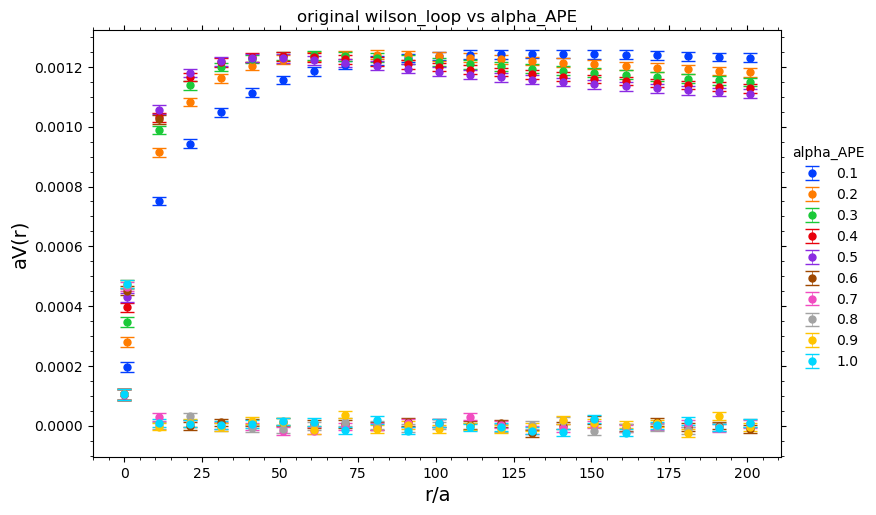

/tmp/ipykernel_9978/906311672.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('r/a').apply(plots.make_plot, 'smearing_step', 'field', 'alpha_APE', 'r/a', 'aV(r)', f'{decomposition_type} wilson_loop vs alpha_APE', '', '', True, err='err')


In [10]:
wilson_alpha_APE_smearing_dependence(10, 10, 'original')

In [3]:
def wilson_alpha_APE(r, T, HYP_steps, decomposition_type):
    paths = [{'path': f'../result/smearing/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP{HYP_steps}_alpha=1_1_0.5_APE_alpha=0.3/steps_500/copies=4/wilson_loop_{decomposition_type}.csv',
              'parameters': {'alpha_APE': 0.3}, 'constraints': {'r/a': (r, r), 'T': (T, T)}},
              {'path': f'../result/smearing/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP{HYP_steps}_alpha=1_1_0.5_APE_alpha=0.4/steps_500/copies=4/wilson_loop_{decomposition_type}.csv',
              'parameters': {'alpha_APE': 0.4}, 'constraints': {'r/a': (r, r), 'T': (T, T)}},
              {'path': f'../result/smearing/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP{HYP_steps}_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=4/wilson_loop_{decomposition_type}.csv',
              'parameters': {'alpha_APE': 0.5}, 'constraints': {'r/a': (r, r), 'T': (T, T)}},
              {'path': f'../result/smearing/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP{HYP_steps}_alpha=1_1_0.5_APE_alpha=0.6/steps_500/copies=4/wilson_loop_{decomposition_type}.csv',
              'parameters': {'alpha_APE': 0.6}, 'constraints': {'r/a': (r, r), 'T': (T, T)}},
              {'path': f'../result/smearing/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP{HYP_steps}_alpha=1_1_0.5_APE_alpha=0.7/steps_500/copies=4/wilson_loop_{decomposition_type}.csv',
              'parameters': {'alpha_APE': 0.7}, 'constraints': {'r/a': (r, r), 'T': (T, T)}},
              {'path': f'../result/smearing/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP{HYP_steps}_alpha=1_1_0.5_APE_alpha=0.8/steps_500/copies=4/wilson_loop_{decomposition_type}.csv',
              'parameters': {'alpha_APE': 0.8}, 'constraints': {'r/a': (r, r), 'T': (T, T)}},
              {'path': f'../result/smearing/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP{HYP_steps}_alpha=1_1_0.5_APE_alpha=0.9/steps_500/copies=4/wilson_loop_{decomposition_type}.csv',
              'parameters': {'alpha_APE': 0.9}, 'constraints': {'r/a': (r, r), 'T': (T, T)}},
              {'path': f'../result/smearing/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP{HYP_steps}_alpha=1_1_0.5_APE_alpha=1/steps_500/copies=4/wilson_loop_{decomposition_type}.csv',
              'parameters': {'alpha_APE': 1}, 'constraints': {'r/a': (r, r), 'T': (T, T)}}]
    df = read_wilson_loops(paths)
    fg = plots.make_plot(df, 'alpha_APE', 'field', 'smearing_step', 'r/a', 'aV(r)', f'{decomposition_type} wilson_loop vs alpha_APE, HYP step = {HYP_steps}', '', '', True, err='err')


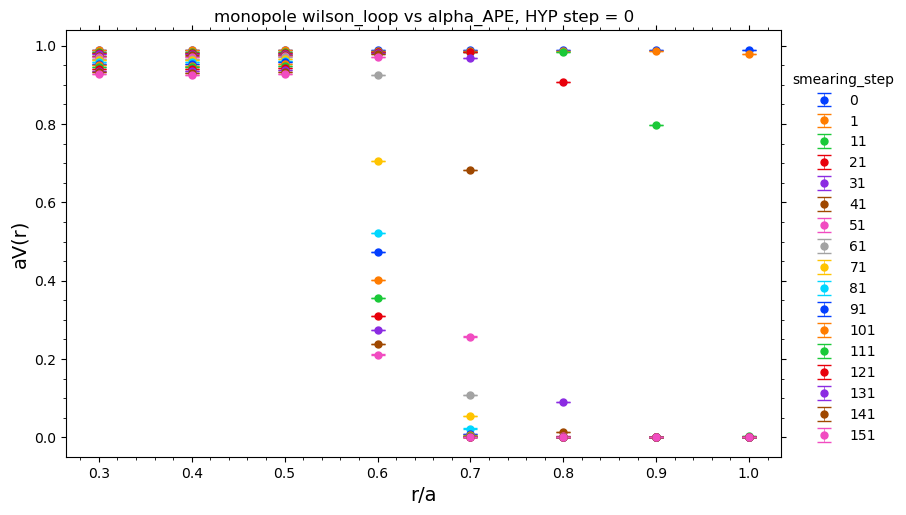

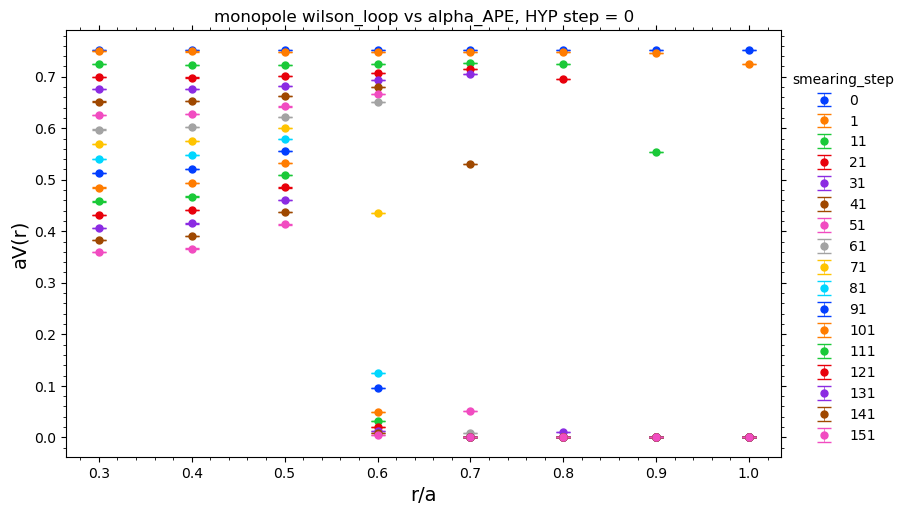

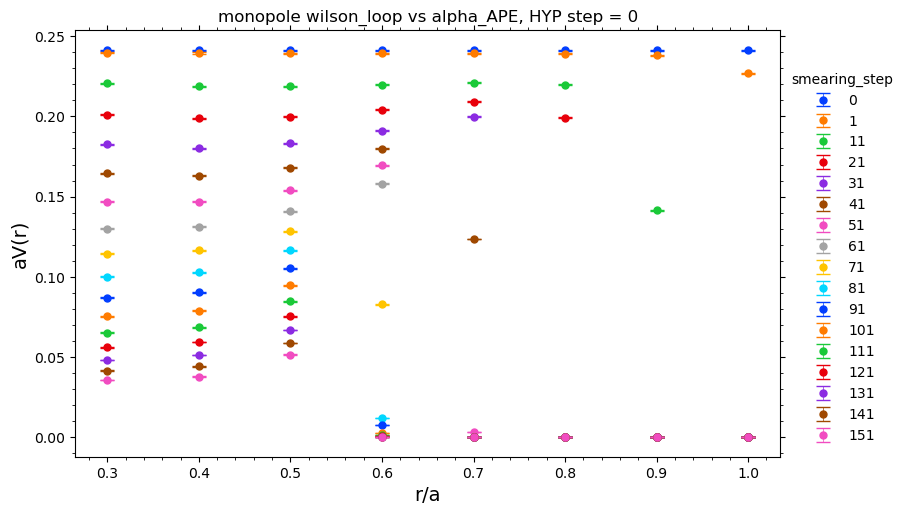

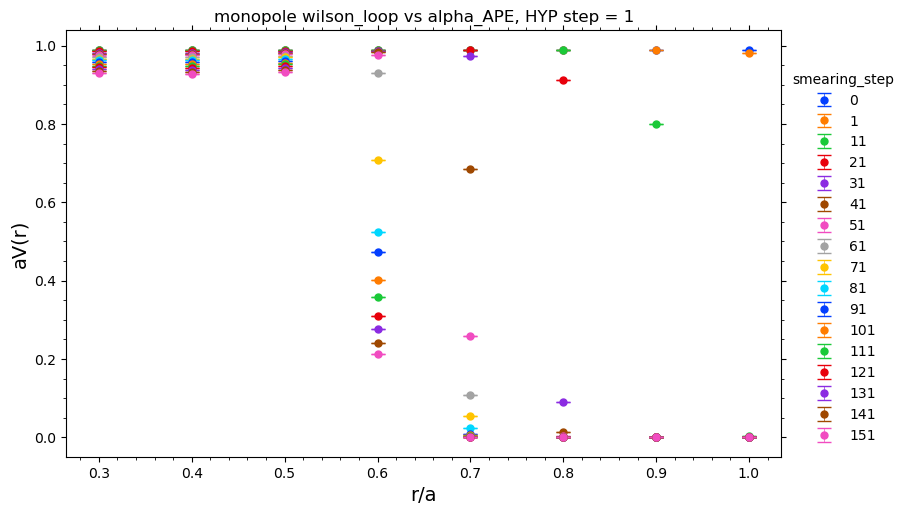

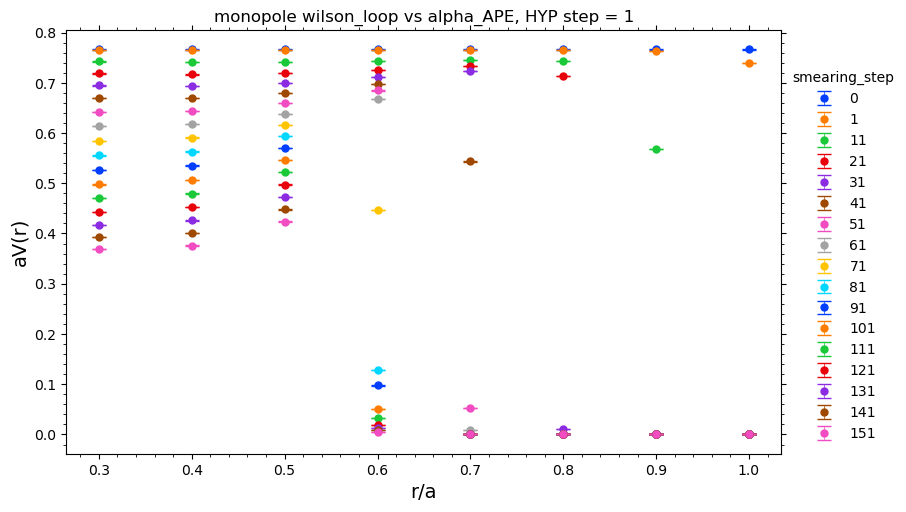

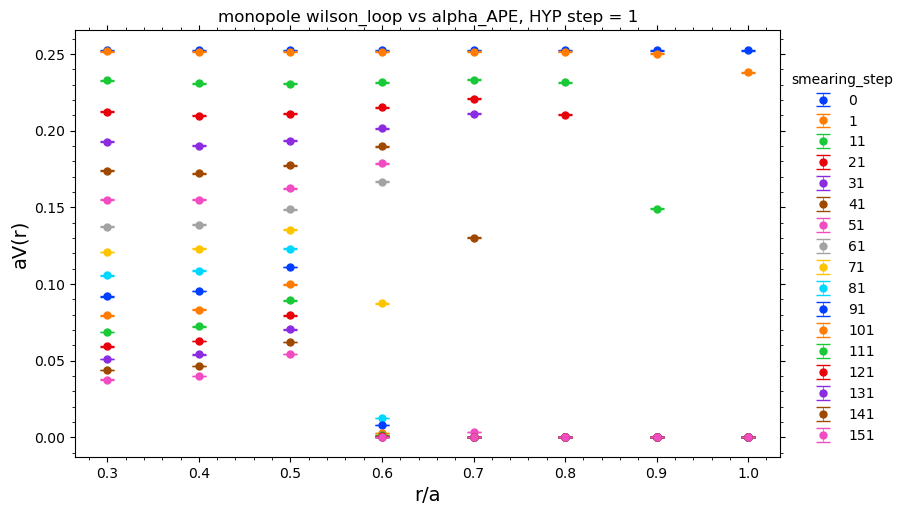

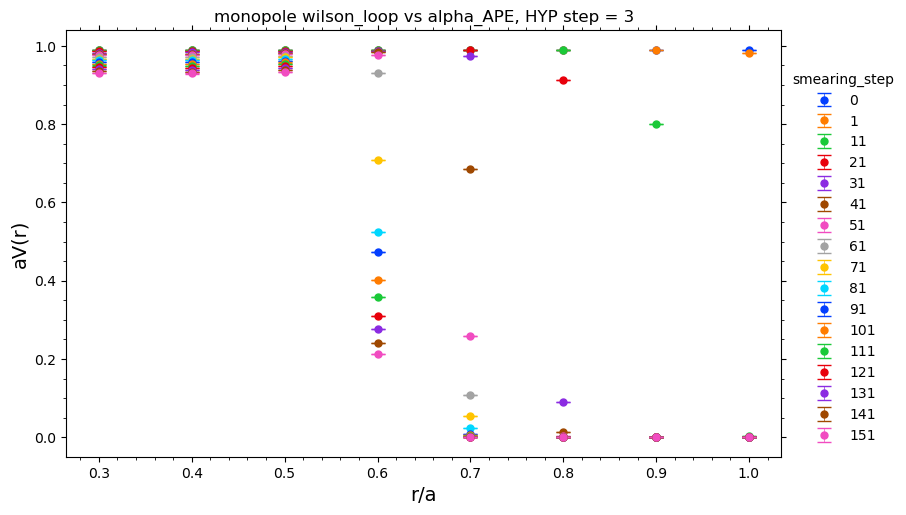

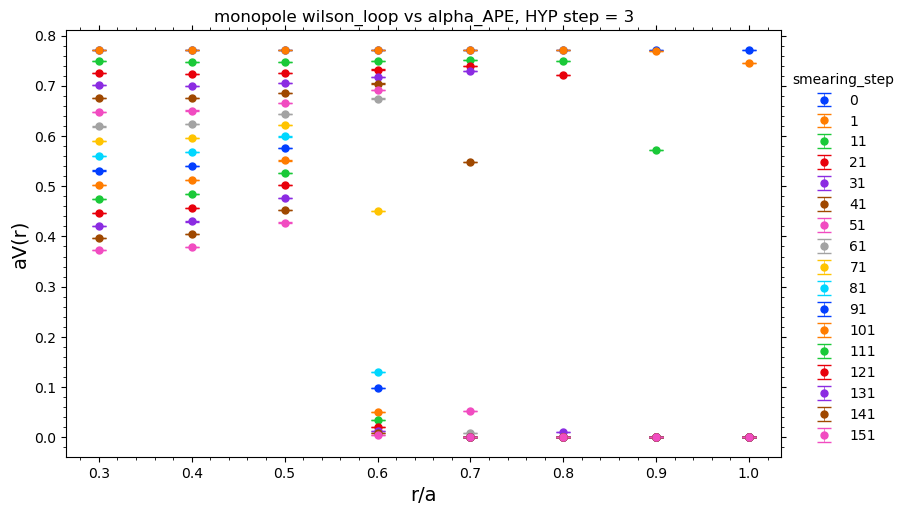

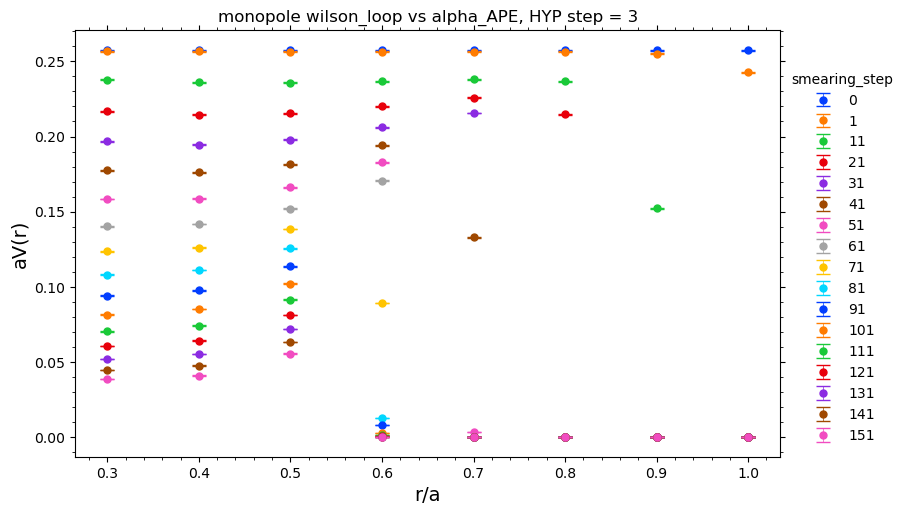

In [4]:
wilson_alpha_APE(1, 1, 0, 'monopole')
wilson_alpha_APE(4, 4, 0, 'monopole')
wilson_alpha_APE(8, 8, 0, 'monopole')
wilson_alpha_APE(1, 1, 1, 'monopole')
wilson_alpha_APE(4, 4, 1, 'monopole')
wilson_alpha_APE(8, 8, 1, 'monopole')
wilson_alpha_APE(1, 1, 3, 'monopole')
wilson_alpha_APE(4, 4, 3, 'monopole')
wilson_alpha_APE(8, 8, 3, 'monopole')

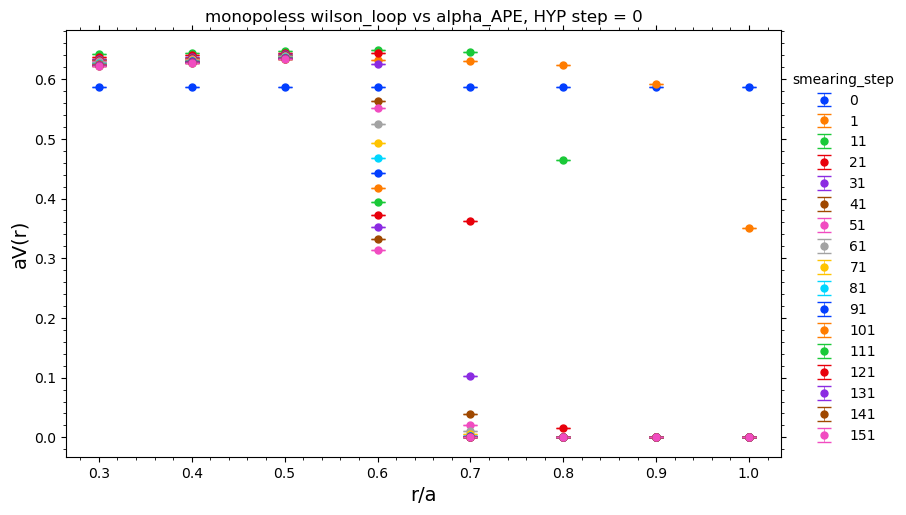

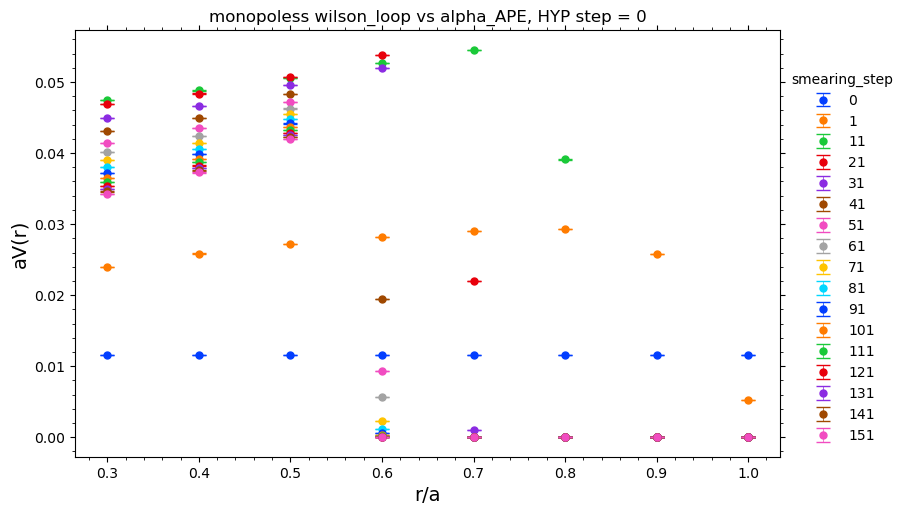

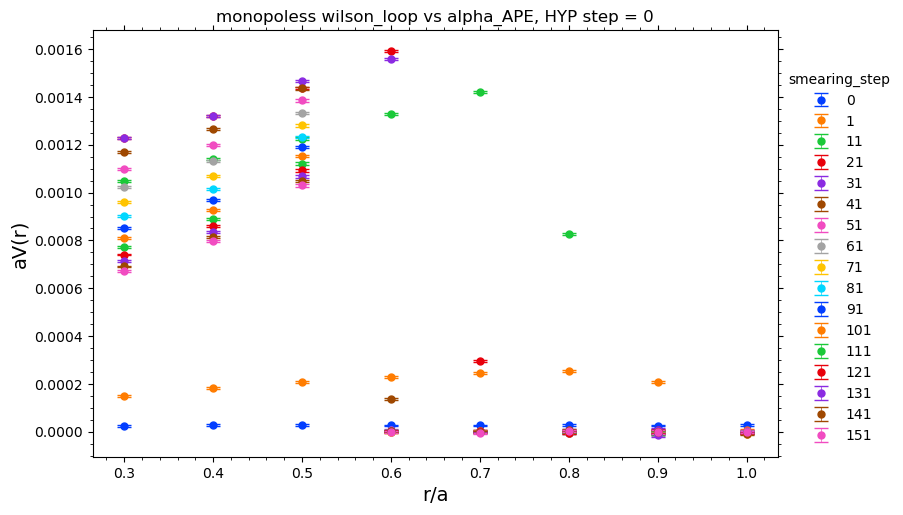

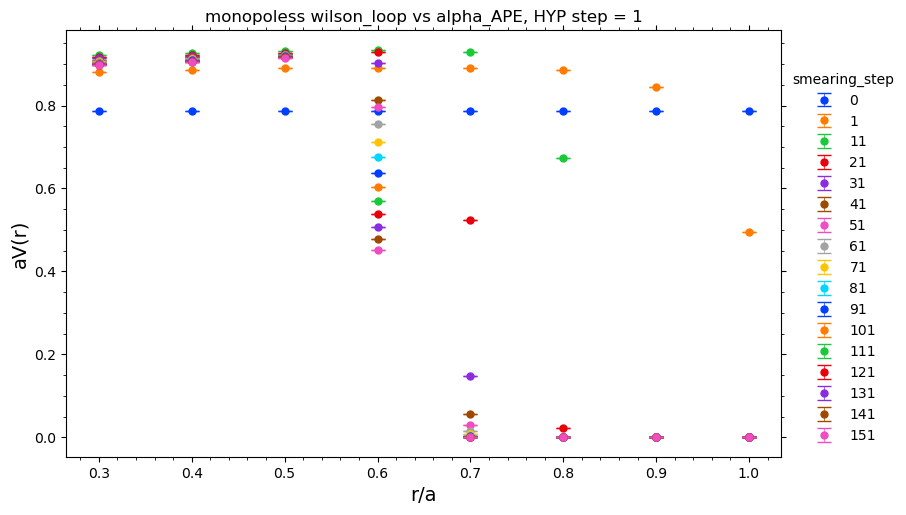

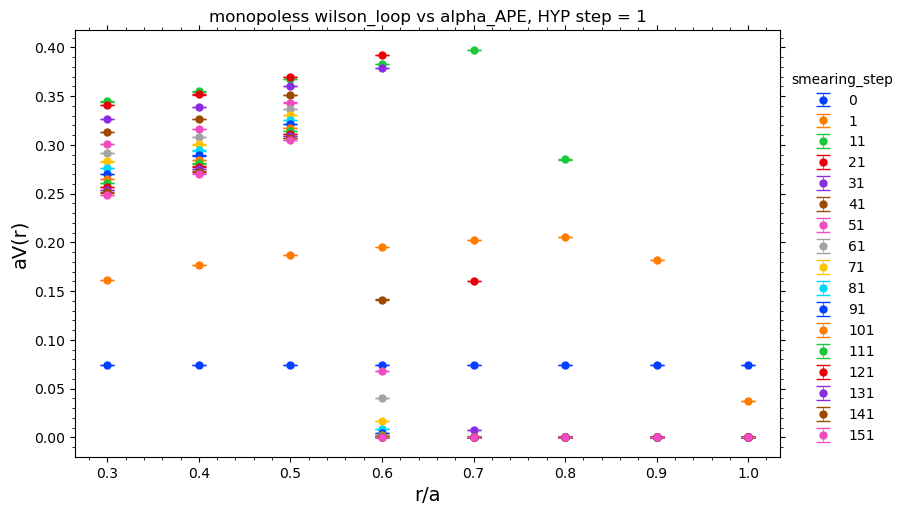

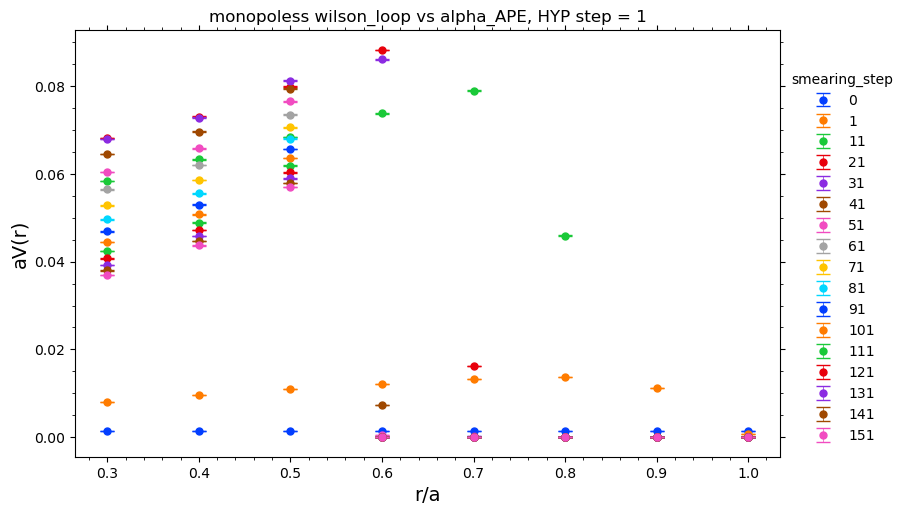

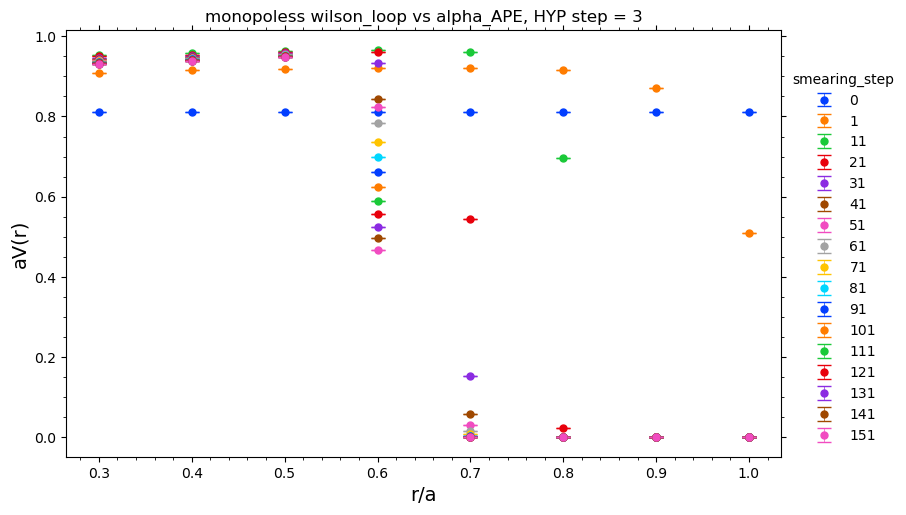

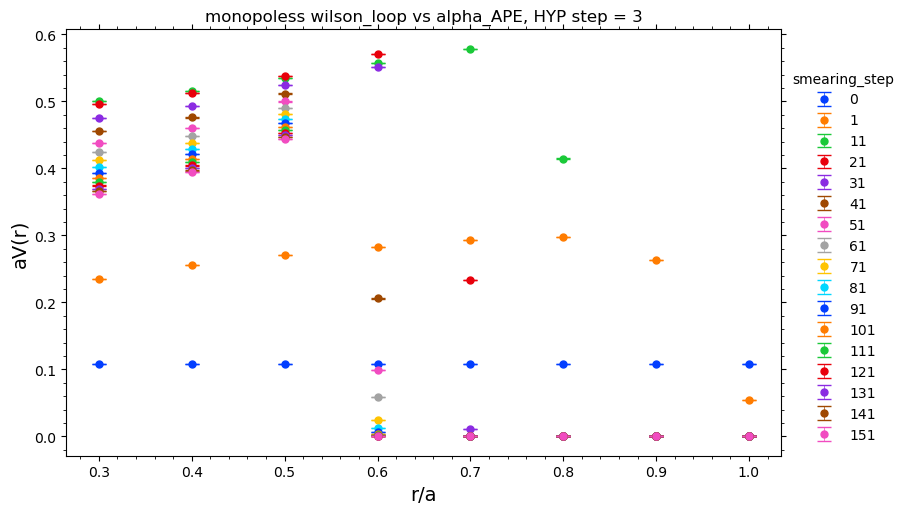

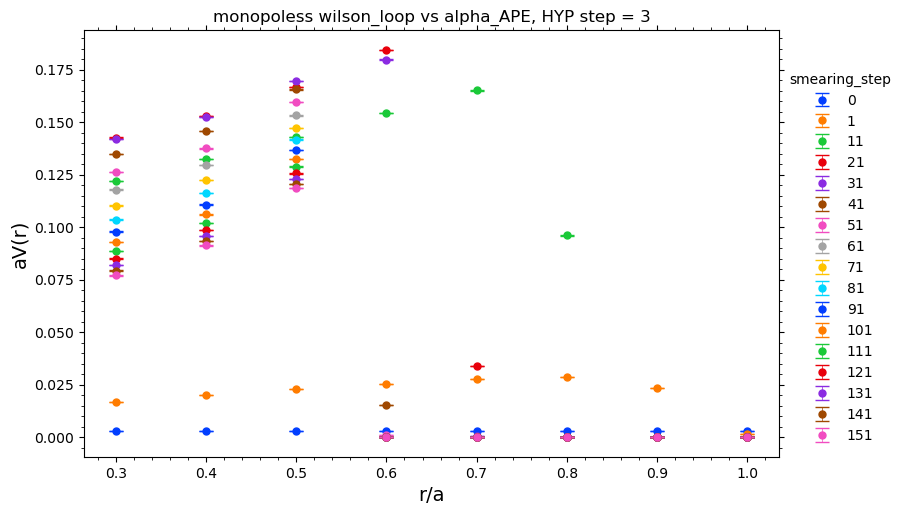

In [5]:
wilson_alpha_APE(1, 1, 0, 'monopoless')
wilson_alpha_APE(4, 4, 0, 'monopoless')
wilson_alpha_APE(8, 8, 0, 'monopoless')
wilson_alpha_APE(1, 1, 1, 'monopoless')
wilson_alpha_APE(4, 4, 1, 'monopoless')
wilson_alpha_APE(8, 8, 1, 'monopoless')
wilson_alpha_APE(1, 1, 3, 'monopoless')
wilson_alpha_APE(4, 4, 3, 'monopoless')
wilson_alpha_APE(8, 8, 3, 'monopoless')

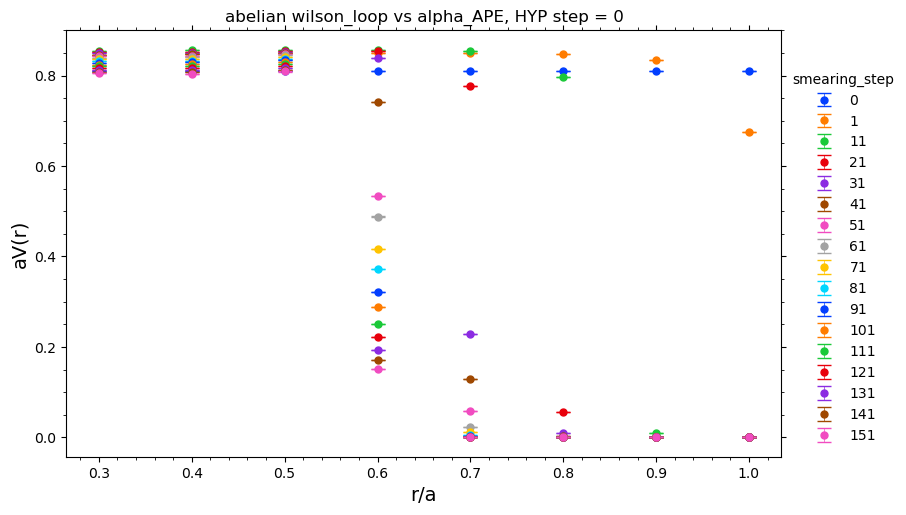

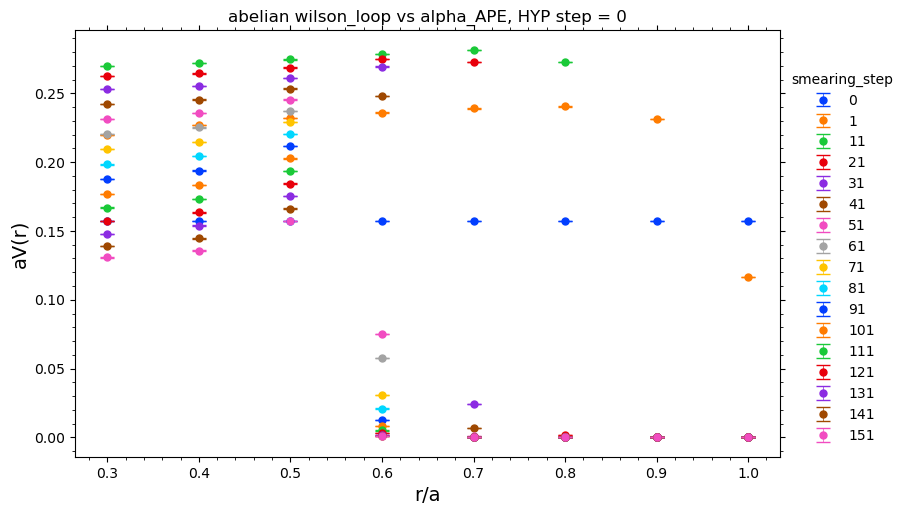

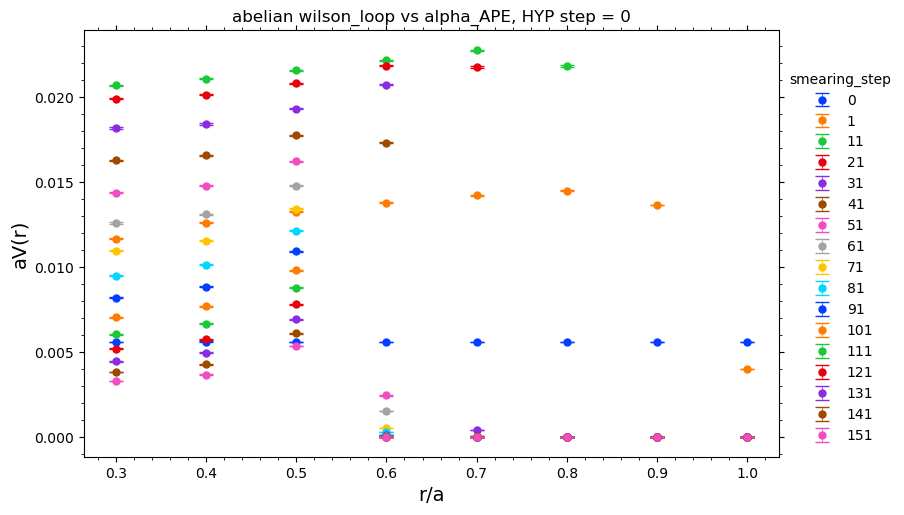

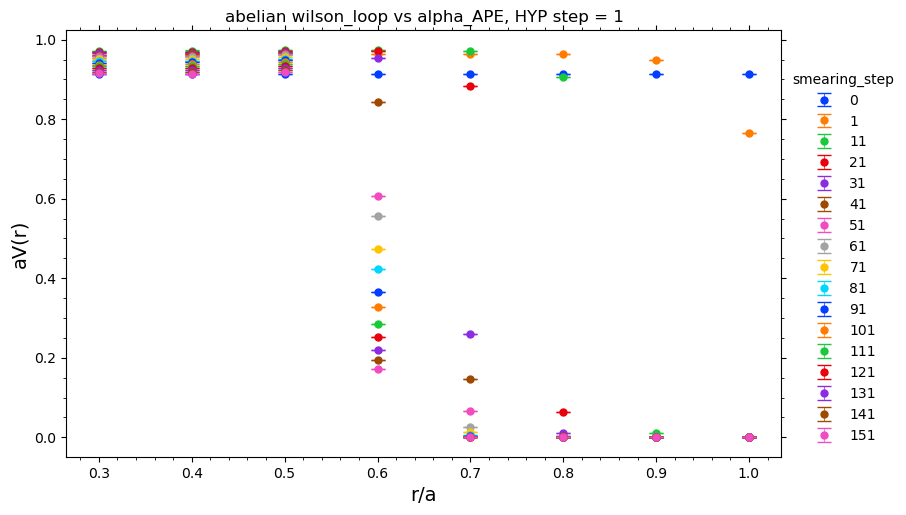

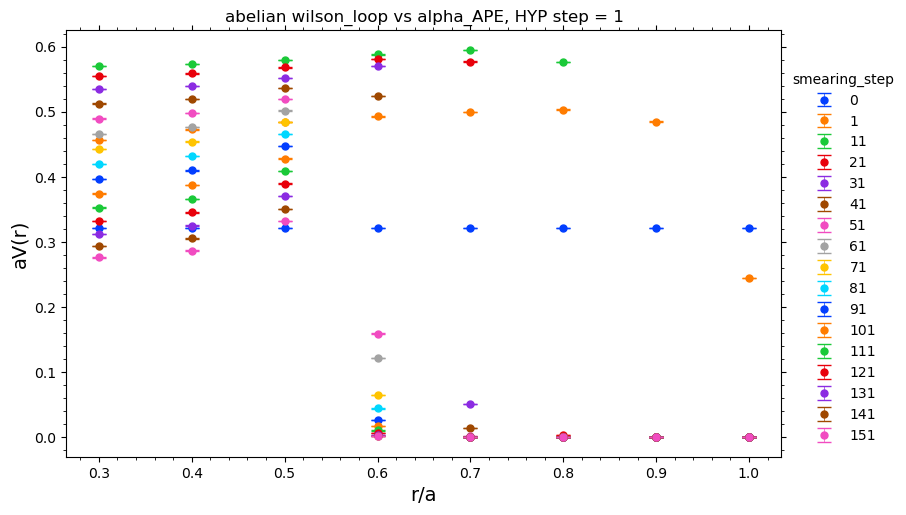

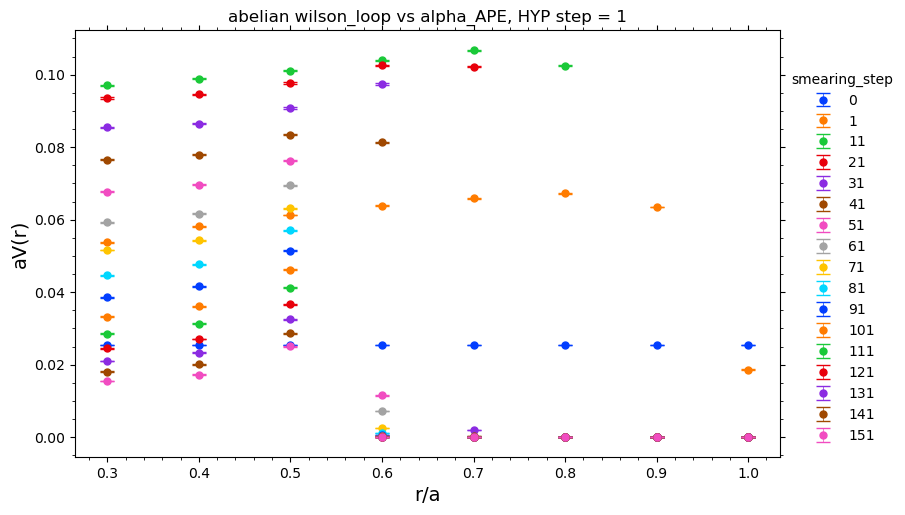

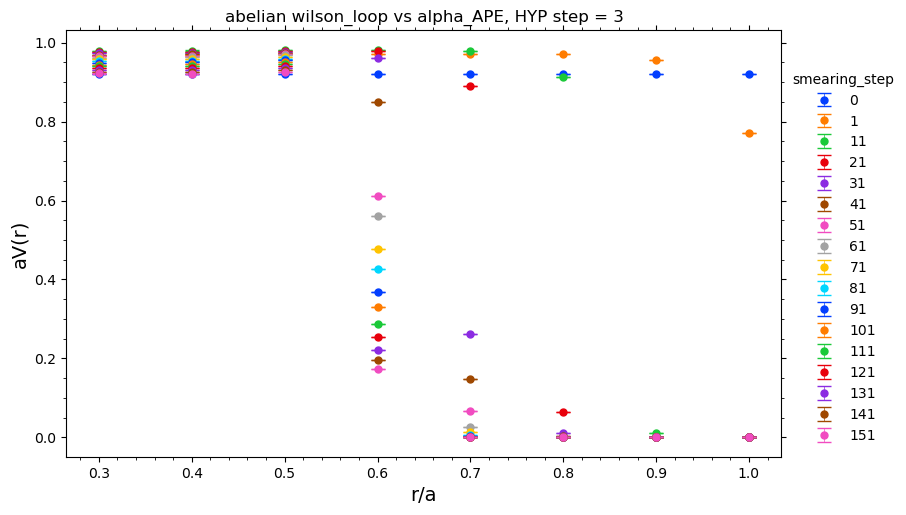

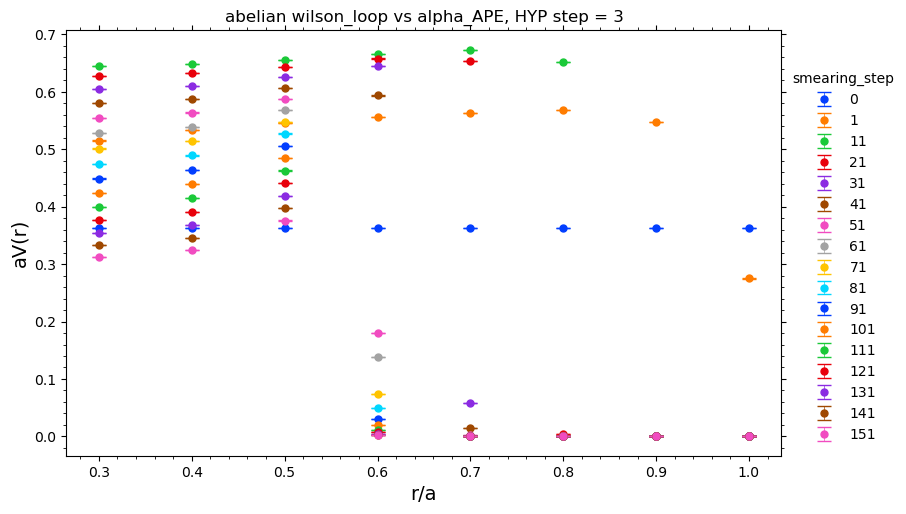

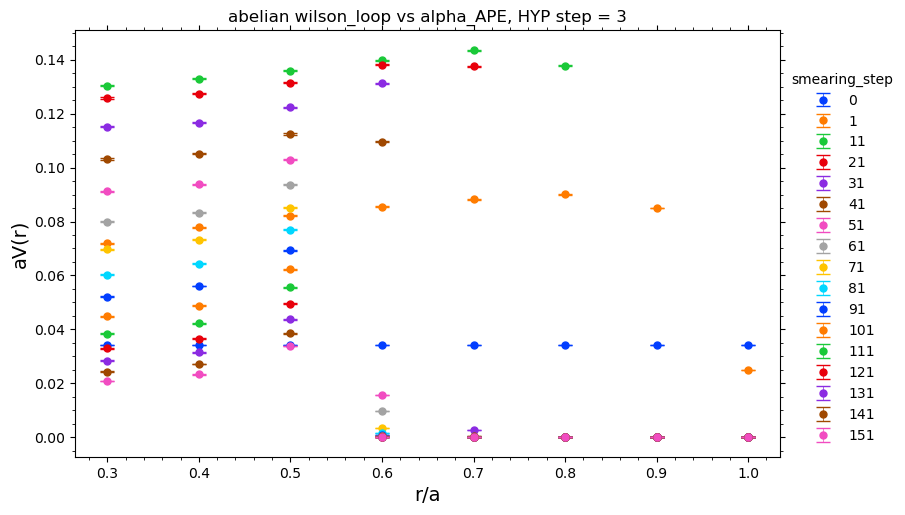

In [6]:
wilson_alpha_APE(1, 1, 0, 'abelian')
wilson_alpha_APE(4, 4, 0, 'abelian')
wilson_alpha_APE(8, 8, 0, 'abelian')
wilson_alpha_APE(1, 1, 1, 'abelian')
wilson_alpha_APE(4, 4, 1, 'abelian')
wilson_alpha_APE(8, 8, 1, 'abelian')
wilson_alpha_APE(1, 1, 3, 'abelian')
wilson_alpha_APE(4, 4, 3, 'abelian')
wilson_alpha_APE(8, 8, 3, 'abelian')

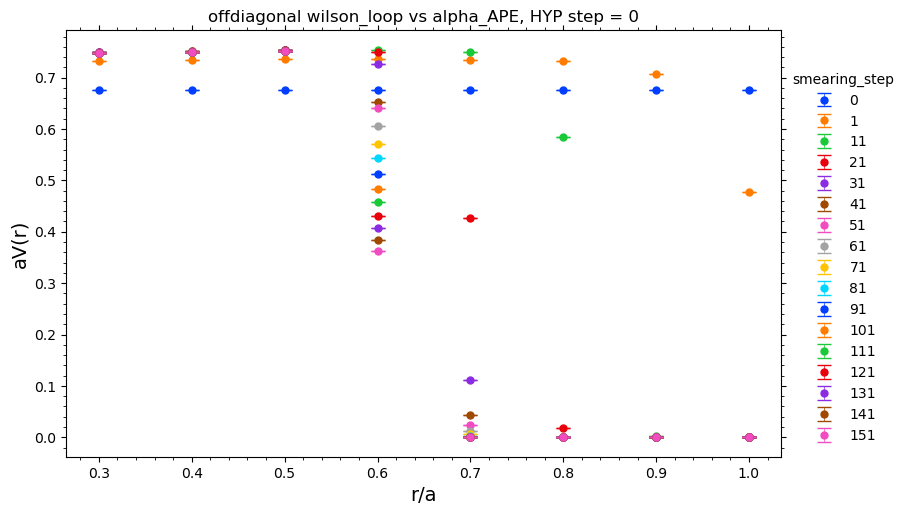

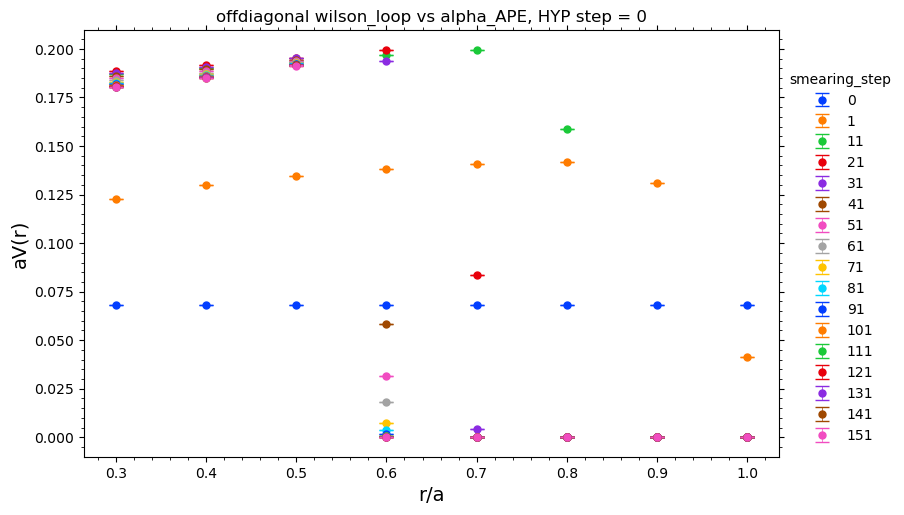

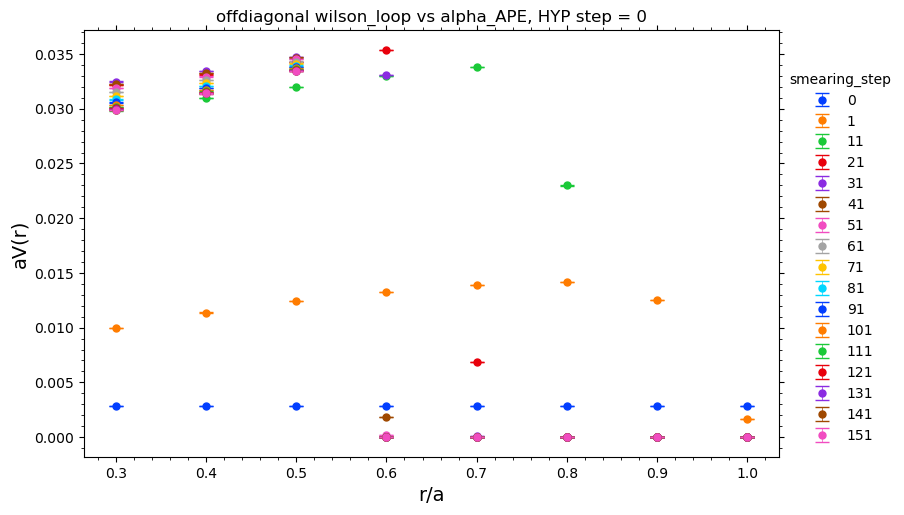

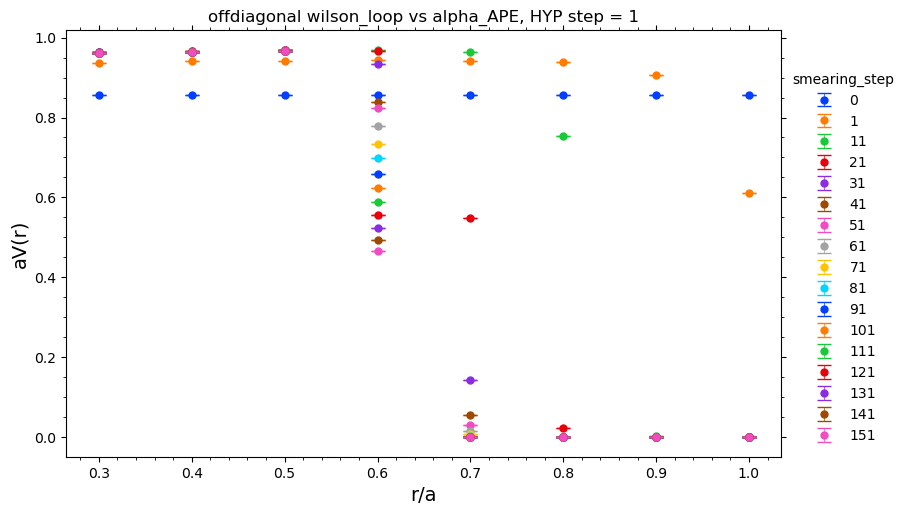

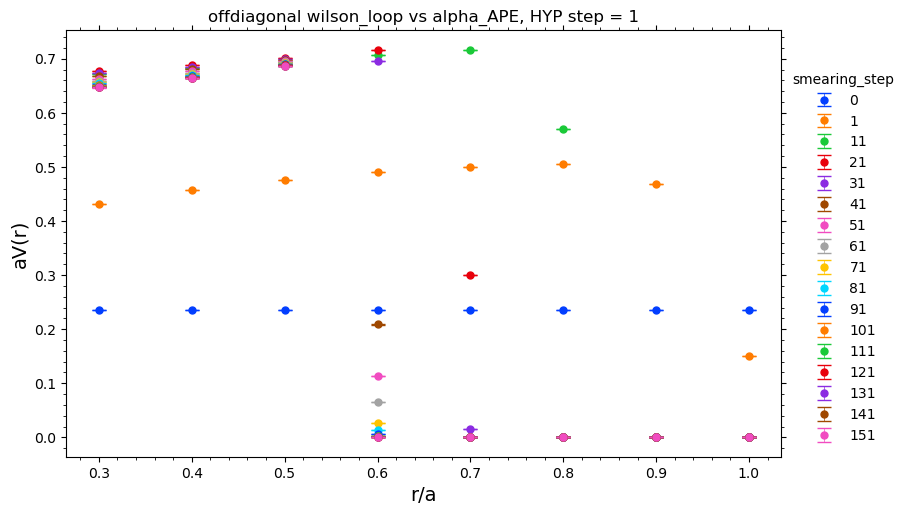

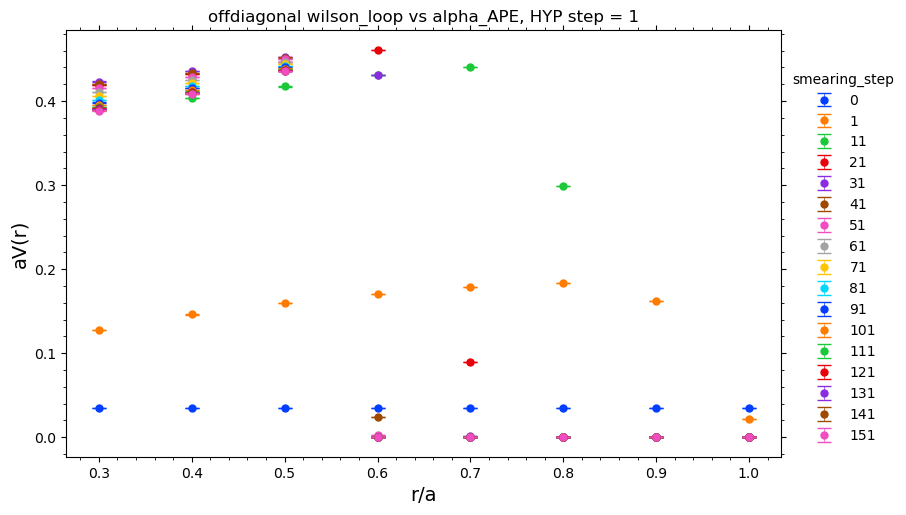

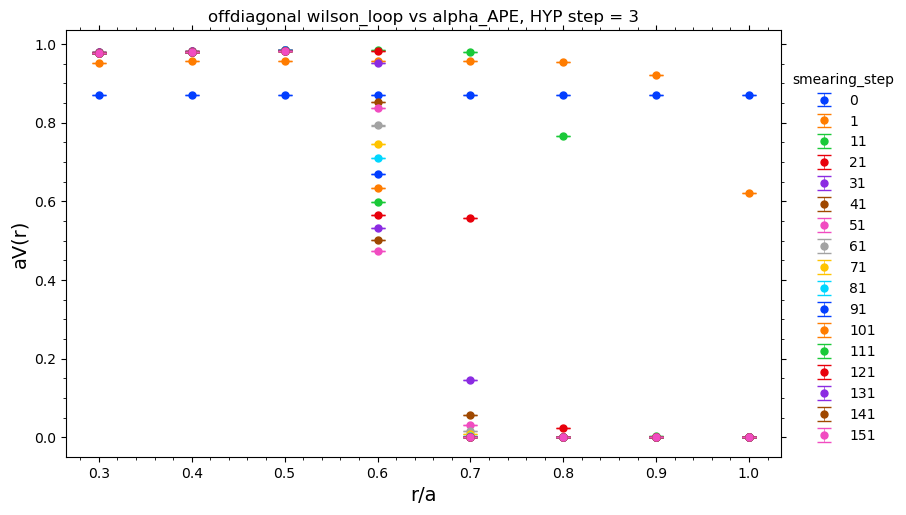

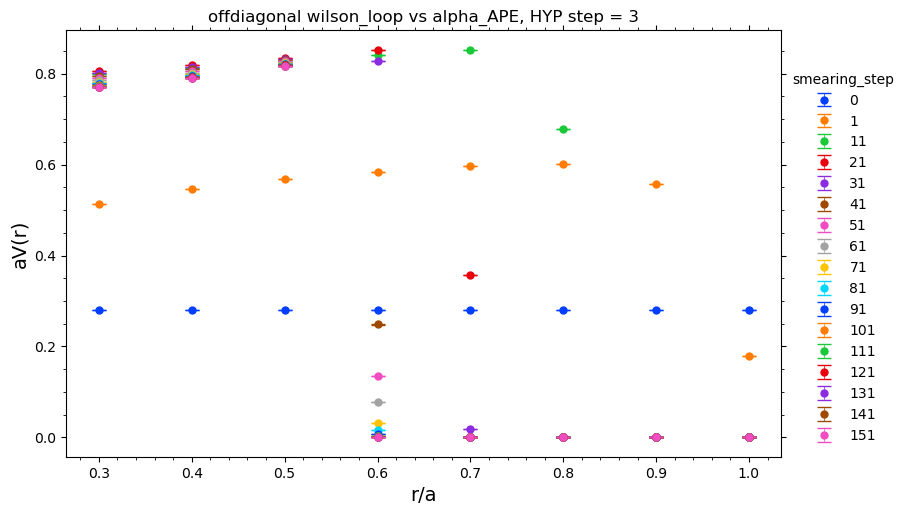

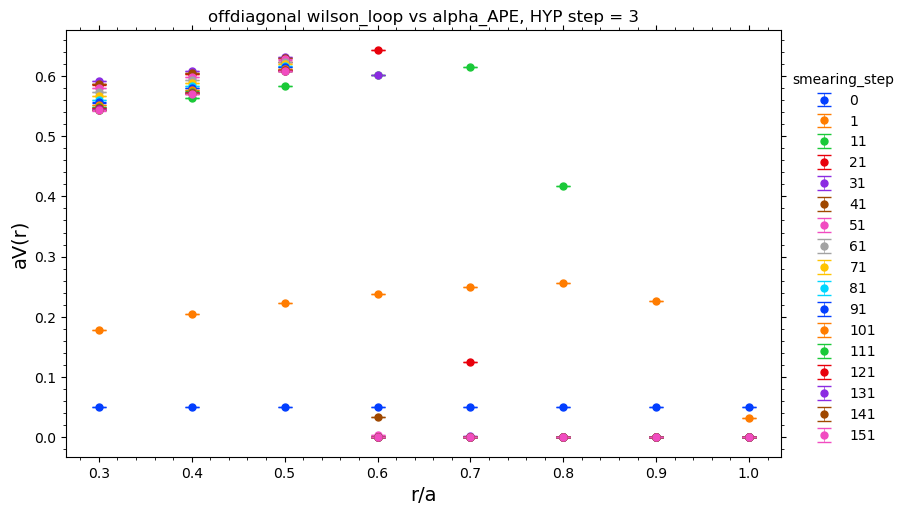

In [7]:
wilson_alpha_APE(1, 1, 0, 'offdiagonal')
wilson_alpha_APE(4, 4, 0, 'offdiagonal')
wilson_alpha_APE(8, 8, 0, 'offdiagonal')
wilson_alpha_APE(1, 1, 1, 'offdiagonal')
wilson_alpha_APE(4, 4, 1, 'offdiagonal')
wilson_alpha_APE(8, 8, 1, 'offdiagonal')
wilson_alpha_APE(1, 1, 3, 'offdiagonal')
wilson_alpha_APE(4, 4, 3, 'offdiagonal')
wilson_alpha_APE(8, 8, 3, 'offdiagonal')

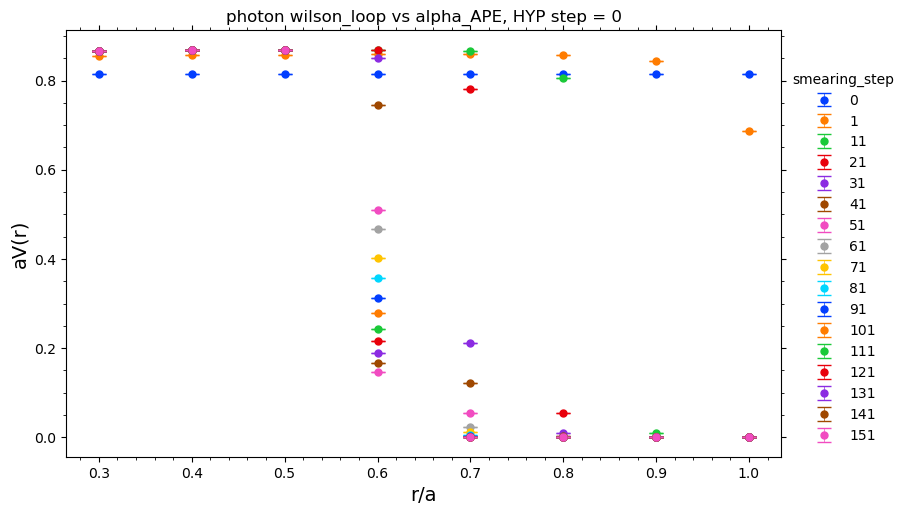

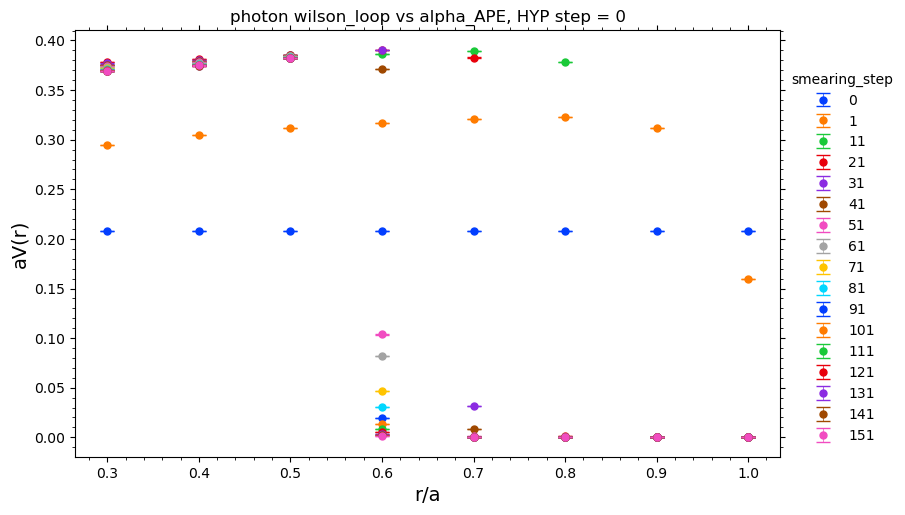

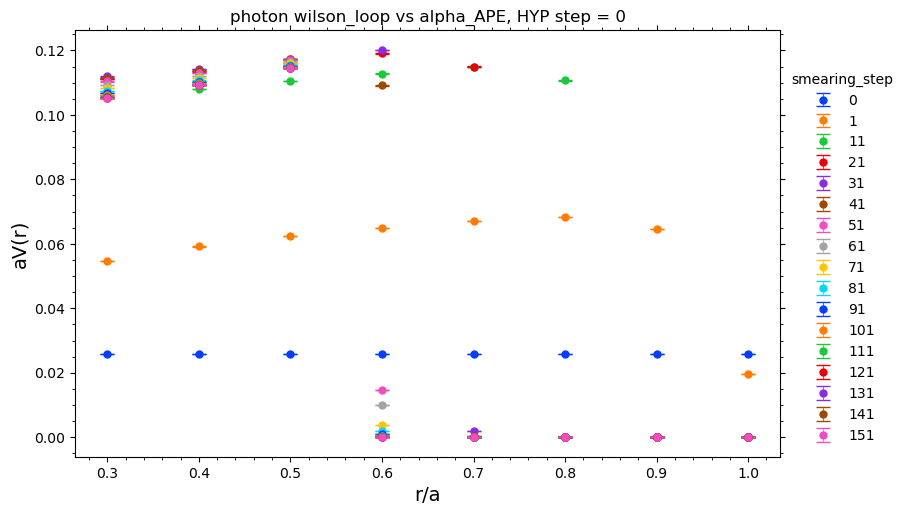

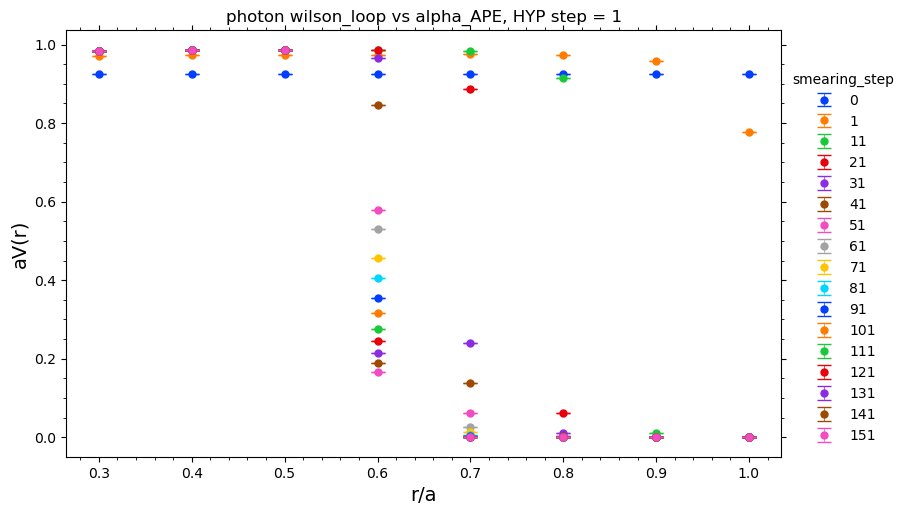

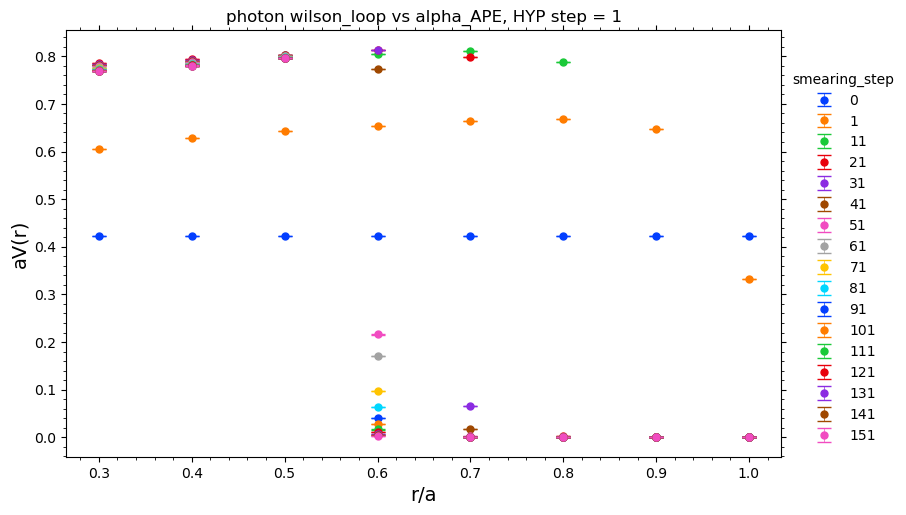

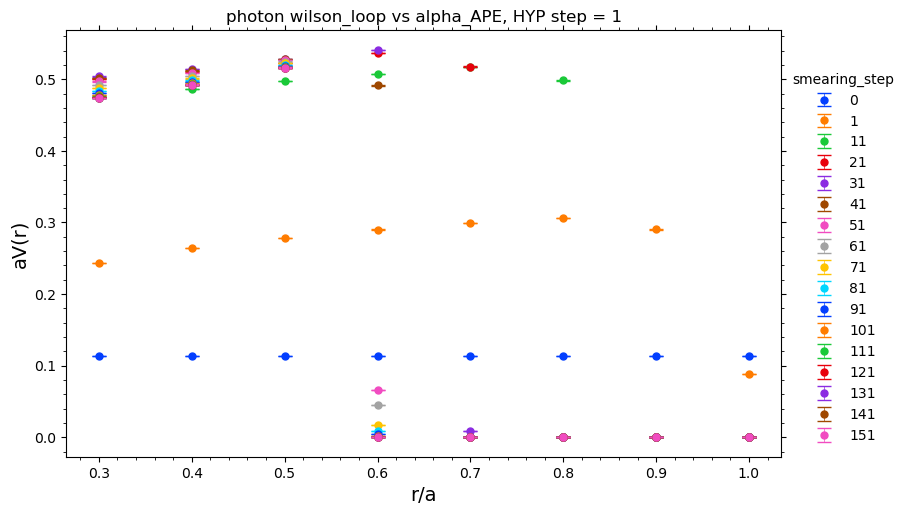

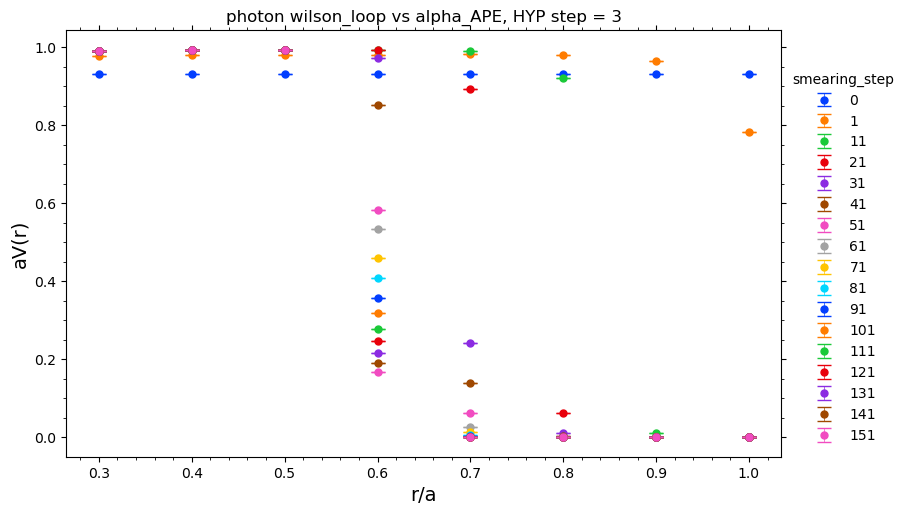

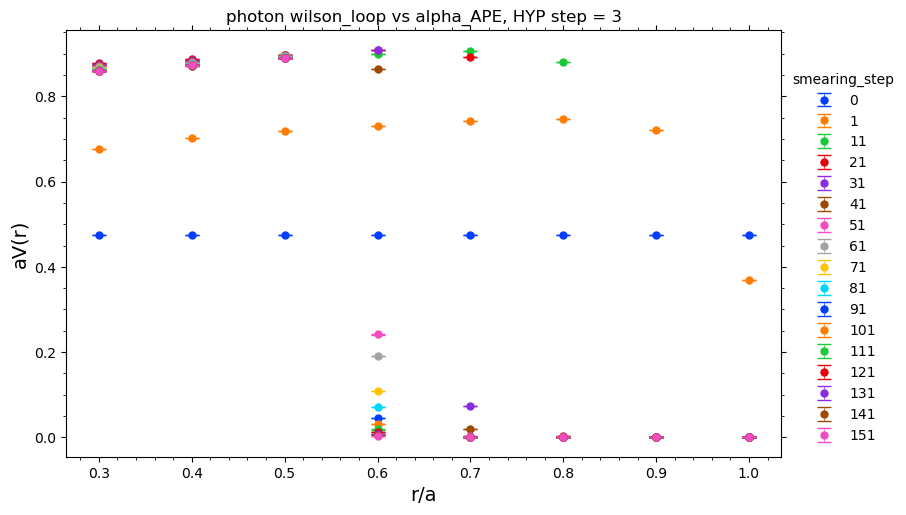

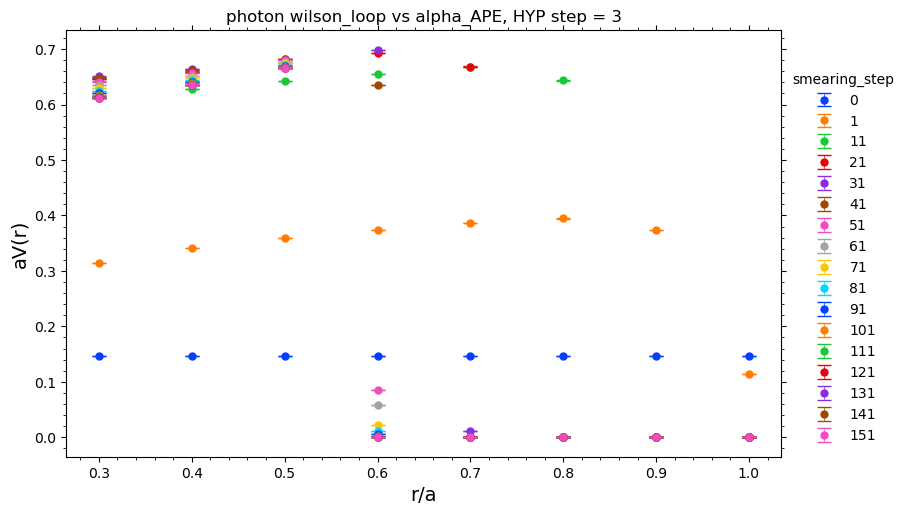

In [8]:
wilson_alpha_APE(1, 1, 0, 'photon')
wilson_alpha_APE(4, 4, 0, 'photon')
wilson_alpha_APE(8, 8, 0, 'photon')
wilson_alpha_APE(1, 1, 1, 'photon')
wilson_alpha_APE(4, 4, 1, 'photon')
wilson_alpha_APE(8, 8, 1, 'photon')
wilson_alpha_APE(1, 1, 3, 'photon')
wilson_alpha_APE(4, 4, 3, 'photon')
wilson_alpha_APE(8, 8, 3, 'photon')

In [9]:
def save_image(image_path, image_name, fg):
    try:
        os.makedirs(image_path)
    except:
        pass

    output_path = f'{image_path}/{image_name}'
    fg.savefig(output_path, dpi=400)

def get_data_type(betas, path):
    data = []
    for beta in betas:
        data.append(pd.read_csv(f'{path}/wilson_loop_beta={beta}.csv'))
        data[-1]['beta'] = beta

    return pd.concat(data)

def plot_ratio(data):
    T = data['T'].iloc[0]
    # beta = data['beta'].iloc[0]
    fg = seaborn.FacetGrid(data=data, hue = 'beta', height=5, aspect=1.61)
    fg.map(plt.errorbar, 'R', 'field_ratio', 'err_ratio', mfc=None, fmt='o', ms = 5, capsize = 5
    ).add_legend()

    fg.ax.set_ylabel(r"$<V_{su2}>/<V_{mon}><V_{nomon}>$")
    fg.ax.set_title(f'T = {T}')

    save_image(f'../images/wilson_loop/', f'ratio_T={T}', fg)


def compare_wilson_loop(betas):
    data = []
    data.append(get_data_type(betas, '../result/wilson_loop/monopole/su2_suzuki/24^4'))
    data[-1] = data[-1].rename(columns={'field': 'field_mon', 'err': 'err_mon'})
    data.append(get_data_type(betas, '../result/wilson_loop/monopoless/su2_suzuki/24^4'))
    data[-1] = data[-1].rename(columns={'field': 'field_nomon', 'err': 'err_nomon'})
    data.append(get_data_type(betas, '../result/wilson_loop/su2_suzuki/24^4'))
    data[-1] = data[-1].rename(columns={'field': 'field_su2', 'err': 'err_su2'})


    data = pd.concat(data, axis = 1)
    data = data.loc[:,~data.columns.duplicated()]

    data = data[data['T'] <= 5]
    data = data[data['R'] <= 5]

    data['err_ratio'] = data.apply(lambda x: math.sqrt(x['err_mon'] ** 2 * x['field_nomon'] ** 2 + x['err_nomon'] ** 2 * x['field_mon'] ** 2), axis=1)
    data['field_ratio'] = data.apply(lambda x: x['field_mon'] * x['field_nomon'], axis=1)

    data['err_ratio'] = data.apply(lambda x: math.sqrt(x['err_su2'] ** 2 / x['field_ratio'] ** 2 + x['err_ratio'] ** 2 * x['field_su2'] ** 2 / x['field_ratio'] ** 4), axis=1)
    data['field_ratio'] = data.apply(lambda x: x['field_su2'] / x['field_ratio'], axis=1)

    data.groupby(['T']).apply(plot_ratio).reset_index()

In [10]:
betas = [2.4, 2.5, 2.6]
compare_wilson_loop(betas)

FileNotFoundError: [Errno 2] No such file or directory: '../result/wilson_loop/monopole/su2_suzuki/24^4/wilson_loop_beta=2.4.csv'